*JSC270, Winter 2020 - Prof. Chevalier*

# <center>  Laboratory 3.1 - "Exploratory Data Analysis: Ok Cupid Profiles"  </center>
## <center> Lab assignment </center>

### <center> Date: January 22, 12:00 - 14:00, BA3175 <br><br> Due Date: January 27, 12:00pm (noon) 
<center>  This assignment is a group assignment. <br>You may work with the teammate of your choice.</center>


***

We are interested in learning about the population of the OKCupid website. This lab assignment builds on the L3.0. pre-lab assignment, and will use data available from the [https://github.com/rudeboybert/JSE_OkCupid](https://github.com/rudeboybert/JSE_OkCupid) website. 

***

<div style="background-color: #f7f7f7; padding:10px;">
    
<h3> Objectives </h3>

<ul>
    <li> critical reasoning w.r.t. data collection </li>
    <li> open-ended problem </li>
    <li> exploratory data analysis </li>
    <li> data analysis and plotting </li>
    <li> reporting of methods, analyses and results </li>
</ul>

<h3> Instructions </h3>

<ul>
    <li> Make a copy of this notebook: <a href="https://classroom.github.com/g/hITxvdh6">https://classroom.github.com/g/hITxvdh6</a> </li>
    <li> Answer the questions in the cells that indicate where your answers should be placed.  </li>
     <li> Make sure that you explain your solutions when asked and comment your code for readability. </li>
    <li> Commit and push changes to the Github classroom repository that has been provided (more details below).</li>
    <li> Submit a pdf report to Quercus (more details below).</li>
 </ul>
    


</div>

***

<br>

# I. A Close Look at Data Dimensions

The objective of this step is to get a better grasp at each of the dimensions and find interesting leads for further exploration. Build on your work answering the pre-lab questions (L3.0, documents available, and data analyses). Perform data cleaning and wrangling operations where relevant.

**Question 1.** What do you think the `ethnicity` dimension corresponds to? Describe what the OKCupid interface may have looked like when users were prompted to enter this information. What are the implications on the data itself, and analyses leveraging this dimension?

First, we will copy our code from L3.0 for downloading and data cleaning.

In [1]:
## Download snapshot of OkCupid data

!wget https://github.com/rudeboybert/JSE_OkCupid/raw/master/profiles.csv.zip
!unzip profiles.csv
!mkdir data
!mv profiles.csv data/

/bin/sh: wget: command not found
unzip:  cannot find or open profiles.csv, profiles.csv.zip or profiles.csv.ZIP.
mkdir: data: File exists
mv: profiles.csv: No such file or directory


In [1]:
import pandas as pd
df = pd.read_csv('data/profiles.csv')
df[['age', 'ethnicity', 'job', 'education']].head(10) # select some columns for display

,age,ethnicity,job,education
0,22,"asian, white",transportation,working on college/university
1,35,white,hospitality / travel,working on space camp
2,38,NaN,NaN,graduated from masters program
3,23,white,student,working on college/university
4,29,"asian, black, other",artistic / musical / writer,graduated from college/university
5,29,white,computer / hardware / software,graduated from college/university
6,32,"white, other",NaN,graduated from college/university
7,31,white,artistic / musical / writer,graduated from college/university
8,24,white,NaN,graduated from college/university
9,37,white,student,working on two-year college


From row 0, row 4, row 6, we notice that this data set allows multiple values of ethnicity for one individual. Therefore, the interface may be a list of questions when users create their account, and there is a non-mandatory question that prompts the users to choose their ethnicity. This interface should allow multiple choices, and the users would tick the checkboxs corresponding to each ethnicity group.  

The advantage of this interface is that it enables mixed-race users to show their complete information if their parents are from different races. However, since there are so many possible combinations, it would be difficult for data analysts to generate a summary. For example, a mixed-raced person might be 3/4 white and 1/4 Asian, and this person would enter both white and Asian, although it is not the most accurate information about his/her ethnicity information.

**Question 2.** What can you say about the `religion` data dimension? Perform a critical analysis of this data dimension, and discuss your reasoning, observations and findings.

First we will remove missing values in `religion`, and split the type and degree of the values.

In [2]:
religion = df[['religion']].dropna()
# Replace 'but' with 'and' for splitting
religion = religion.replace('agnosticism but not too serious about it', 'agnosticism and not too serious about it')
religion = religion.replace('atheism but not too serious about it', 'atheism and not too serious about it')
religion = religion.replace('buddhism but not too serious about it', 'buddhism and not too serious about it')
religion = religion.replace('catholicism but not too serious about it', 'catholicism and not too serious about it')
religion = religion.replace('christianity but not too serious about it', 
                            'christianity and not too serious about it')
religion = religion.replace('hinduism but not too serious about it', 'hinduism and not too serious about it')
religion = religion.replace('islam but not too serious about it', 'islam and not too serious about it')
religion = religion.replace('judaism but not too serious about it', 'judaism and not too serious about it')
religion = religion.replace('other but not too serious about it', 'other and not too serious about it')

# Represent missing degree with 'N/A'
religion = religion.replace('agnosticism', 'agnosticism and N/A')
religion = religion.replace('atheism', 'atheism and N/A')
religion = religion.replace('buddhism', 'buddhism and N/A')
religion = religion.replace('catholicism', 'catholicism and N/A')
religion = religion.replace('christianity', 'christianity and N/A')
religion = religion.replace('hinduism', 'hinduism and N/A')
religion = religion.replace('islam', 'islam and N/A')
religion = religion.replace('judaism', 'judaism and N/A')
religion = religion.replace('other', 'other and N/A')

# split
religion['religion_type'] = religion['religion'].map(lambda x: x.split(' and ')[0])
religion['religion_degree'] = religion['religion'].map(lambda x: x.split(' and ')[1])

In [3]:
r = religion.groupby('religion_type').count()
r.columns = ['type', 'count']
r = r.drop(['type'], axis=1).sort_values(by='count', ascending=False)
r

,count
religion_type,
agnosticism,8812
other,7743
atheism,6985
christianity,5787
catholicism,4758
judaism,3098
buddhism,1948
hinduism,450
islam,139


We notice that the top three religion types are agnosticism, other, and atheism, showing that a lot of OkCupid users do not claim faith in god. For users who believe in some religion, the most popular groups are christianity and catholicism, which are the predominant religions in the United States. Islam is the least popular group. On the one hand, it is possible that a relatively small percentage of people believe in Islam; on the other hand, maybe less Islamic people would use dating websites.

Next, we would look into each type to see what are people's attitude towards their religion.

In [4]:
r_count = religion.groupby(['religion_type', 'religion_degree']).count()
r_count = r_count.reset_index(level=[0,1])

In [5]:
r_count

,religion_type,religion_degree,religion
0,agnosticism,N/A,2724
1,agnosticism,laughing about it,2496
2,agnosticism,not too serious about it,2636
3,agnosticism,somewhat serious about it,642
4,agnosticism,very serious about it,314
5,atheism,N/A,2175
6,atheism,laughing about it,2074
7,atheism,not too serious about it,1318
8,atheism,somewhat serious about it,848
9,atheism,very serious about it,570


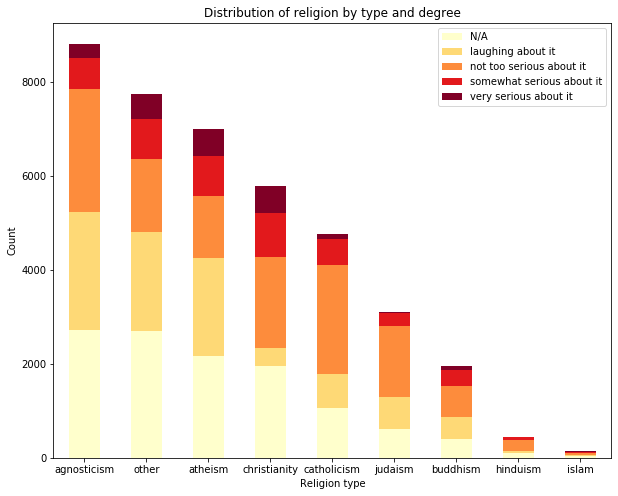

In [17]:
import matplotlib.pyplot as plt
data = r_count.set_index(['religion_type', 'religion_degree']).religion
data = data.unstack()

data['Total'] = data.apply('sum', axis=1)

# data.unstack().plot(kind='bar', stacked=True, figsize=(12,8),cmap="YlOrRd")
data.sort_values('Total', ascending=False)\
       .drop(columns=['Total'])\
       .plot(kind="bar", stacked=True, figsize=(10,8),cmap="YlOrRd")

plt.legend(loc='upper right')

plt.title("Distribution of religion by type and degree")
plt.xlabel("Religion type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

From the stacked bar chart, we can see that across all religion groups, a large porportion of people are not serious about their religion. 

**Question 3.** What can you say about the `drugs` data dimension? Perform a critical analysis, and discuss your reasoning, observations and findings.

In [8]:
drugs = df['drugs'].groupby(df['drugs']).count()
drugs = pd.DataFrame(drugs)
drugs.columns = ['count']
drugs = drugs.sort_values(by='count', ascending = False).reset_index()
drugs

,drugs,count
0,never,37724
1,sometimes,7732
2,often,410


The majority of people are not drug users. Next, we would explore the `job` of drug users.

In [9]:
drugs = df[~df.drugs.isna()]
drugs = drugs[drugs.drugs != 'never'] # remove people who are not drug users
drugs = drugs[['drugs', 'education', 'job']].reset_index(drop=True)
drugs.head()

,drugs,education,job
0,sometimes,working on space camp,hospitality / travel
1,sometimes,graduated from college/university,artistic / musical / writer
2,sometimes,graduated from college/university,other
3,sometimes,graduated from masters program,artistic / musical / writer
4,sometimes,graduated from masters program,other


In [10]:
drugs = drugs.groupby('job').size()
counts = pd.DataFrame(drugs)
counts.columns = ['count']
counts = counts.sort_values(by='count', ascending = False).reset_index()

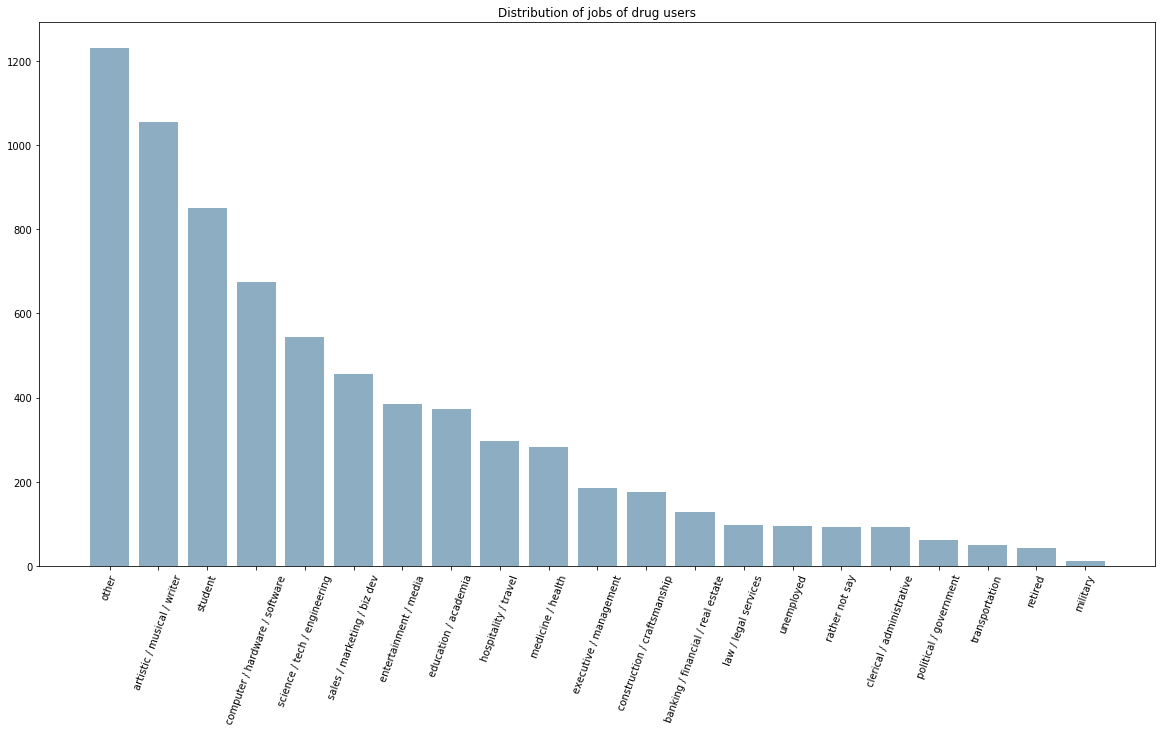

In [11]:
plt.figure(figsize=(20,10))

plt.bar(counts['job'], counts['count'], color='#5D8BA9', alpha=0.7)
plt.xticks(rotation=70)
plt.title("Distribution of jobs of drug users")
plt.show()

Apart from 'other', 'artistic/musical/writer' is the group with most drug users, which corresponds to some artists' claim that drug use would enhance creativity. It is interesting that less than 200 drug users belong to the unemployed group. This is probably due to the high price of drugs, and unemployed people do not have a stable income to buy drugs. We will further analyze the relationship between `drugs` and `income` in another question in our report.

**Question 4.** Use statistical methods to define different groups of users based on `age`. Explore the characteristics of these different population groups with regard to (a) `ethnicity`, (b) `religion`, (c) `drugs`, and any other data dimension(s) or combination of data dimensions that you find relevant to explore.

First, we will use a box plot to visualize the distribution of `age`.

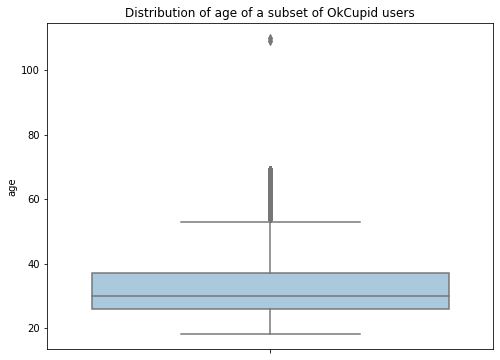

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = sns.boxplot(y="age", data=df, color="#A3CBE5")
plt.title("Distribution of age of a subset of OkCupid users")
plt.show()

The data points with an age above 100 are outliers that would heavily skew the distribution. And since the number of people with an age above 100 is small compared to the size of our dataset, removing them would not have a large impact.

We will remove the outliers, and divide the people in this data set into 5 age groups, each containing 20% of the people.

In [13]:
df = df[df['age']<100]

q0 = df['age'].quantile(0)
q1 = df['age'].quantile(0.2)
q2 = df['age'].quantile(0.4)
q3 = df['age'].quantile(0.6)
q4 = df['age'].quantile(0.8)
q5 = df['age'].quantile(1)

print("The age groups are: ")
print(q0, "-", q1, "years old")
print(q1, "-", q2, "years old")
print(q2, "-", q3, "years old")
print(q3, "-", q4, "years old")
print(q4, "-", q5, "years old")

The age groups are: 
18.0 - 25.0 years old
25.0 - 28.0 years old
28.0 - 32.0 years old
32.0 - 39.0 years old
39.0 - 69.0 years old


Next we would investigate the relationship between `age` and other variables.

### 1. `age` and `ethinicity`

In [14]:
df2 = df[~df.ethnicity.isnull()].reset_index(drop=True) # remove rows with missing values in ethnicity
e_list = df2.ethnicity.str.split(",")

rows = []
for i in range(len(e_list)):
    for e in e_list[i]:
        # select some columns otherwise the dataset would be too large for this question
        other_cols = df2.loc[i, ['age', 'ethnicity']] 
        other_cols = other_cols.to_dict()

        other_cols['ethnicity'] = e.strip()
        rows.append(other_cols)

df2 = pd.DataFrame(rows)

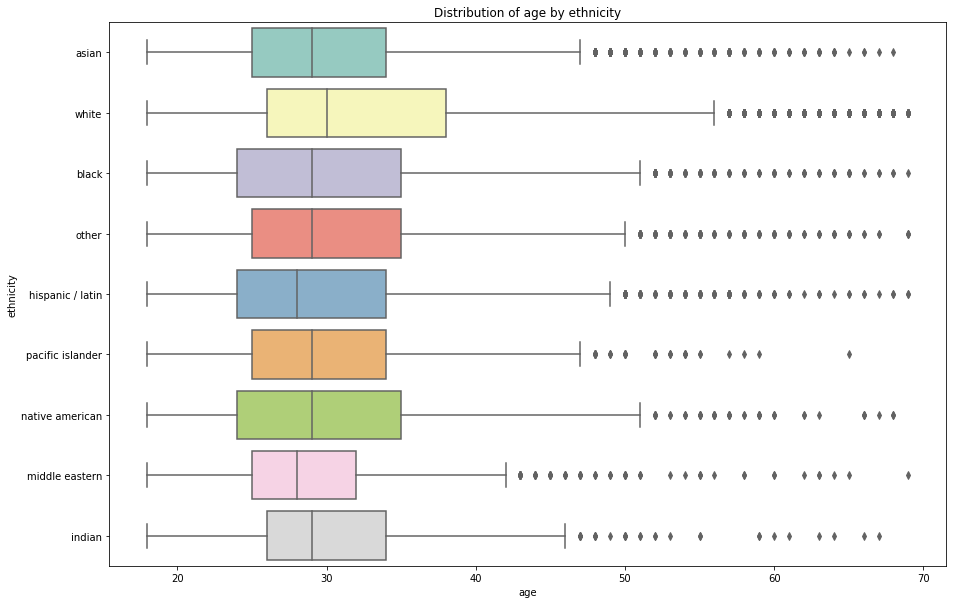

In [15]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.boxplot(y="ethnicity", x="age", data=df2, palette='Set3')
plt.title("Distribution of age by ethnicity")
plt.show()

The age distribution of white people has the largest range, and is more heavily distributed towards older people compared with other groups. Middle eastern is the group with the narrowest range. The median age across all ethnicity groups is around 30 years old.

### 2. `age` and `religion`

In [16]:
# join data set to combine information of age and religion type and degree
df3 = df[['age']]
df3 = df3.join(religion)[['age', 'religion_type', 'religion_degree']].dropna()
df3.head()

,age,religion_type,religion_degree
0,22,agnosticism,very serious about it
1,35,agnosticism,not too serious about it
5,29,atheism,N/A
7,31,christianity,N/A
8,24,christianity,not too serious about it


We can use a violin plot to visualize the distribution of age by religion type.

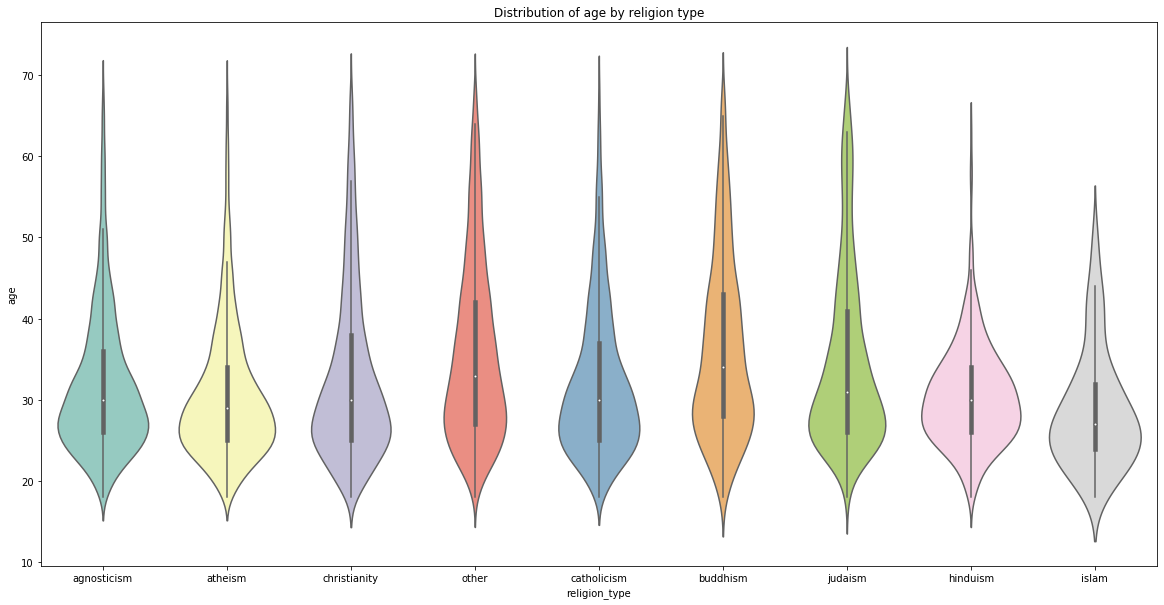

In [17]:
plt.figure(figsize=(20,10))

sns.violinplot(x='religion_type', y='age', data=df3, palette='Set3')
#sns.swarmplot(x='religion_type', y='age', data=df3.sample(n=1000))

plt.title("Distribution of age by religion type")
plt.show()

Most groups have a distribution centered at the age around 30, which is expected because a large number of users are between 25-32 years old. However, it is interesting that 'other' and 'buddhism' have a narrower shape compared with other groups, showing a larger porportion of older users. It is also noted that users believing in Islam is a younger group.

Then we would explore the age distribution of users with different attitudes towards their religion.

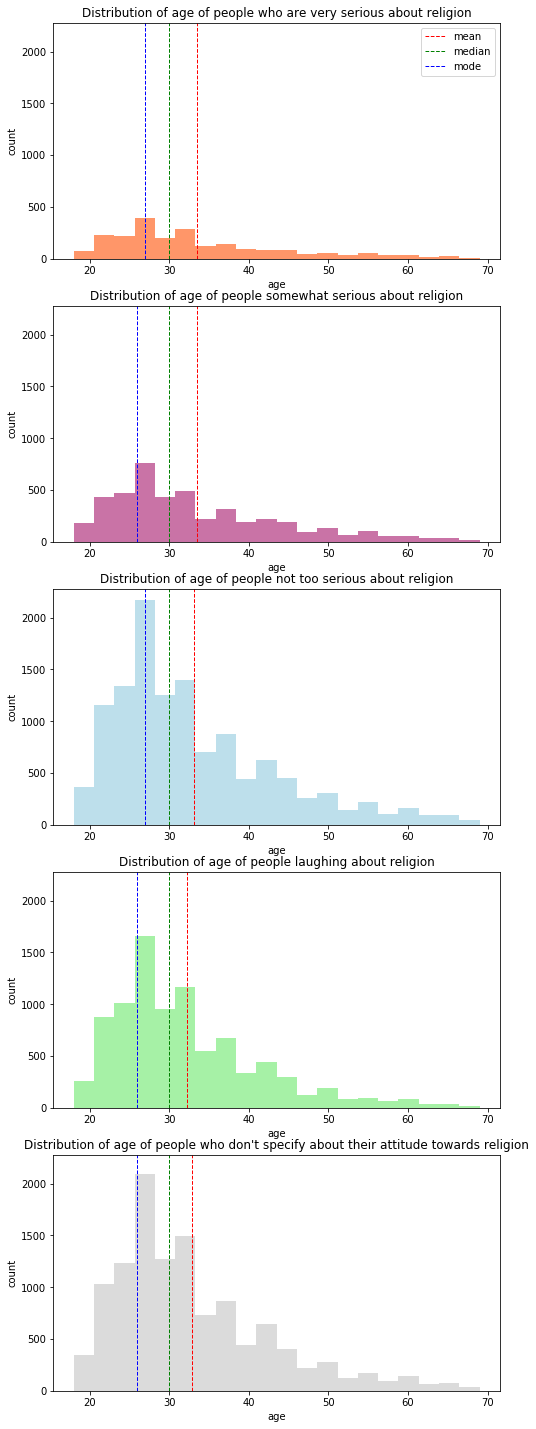

In [18]:
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(5, 1, figsize=(8, 10), sharey=True)

def addHist(degree, title, color, index):
    data = df3[df3['religion_degree'] == degree]['age'] # select age by religion degree
    
    axs[index].hist(data, alpha=0.8, bins=20, color=color)
    axs[index].set_xlabel("age")
    axs[index].set_ylabel("count")
    axs[index].set_title(title)
    
    # add lines of mean, median, mode
    axs[index].axvline(data.mean(), 
            linewidth=1, color='red', linestyle='--', label = "mean") 
    axs[index].axvline(data.median(), 
            linewidth=1, color='green', linestyle='--', label = "median")
    axs[index].axvline(stats.mode(data).mode[0], 
            linewidth=1, color='blue', linestyle='--', label = "mode")
    
plt.subplots_adjust(bottom=0.1, top=2)
addHist('very serious about it', "Distribution of age of people who are very serious about religion",
        "#ff7c43",0)
axs[0].legend(loc='upper right')
addHist('somewhat serious about it', "Distribution of age of people somewhat serious about religion", "#bc5090",1)
addHist('not too serious about it', "Distribution of age of people not too serious about religion", "lightblue",2)
addHist('laughing about it', "Distribution of age of people laughing about religion", "lightgreen",3)
addHist('N/A', "Distribution of age of people who don't specify about their attitude towards religion",
        "lightgray",4)

When grouping by attitudes towards religion, all five groups have the same median at 30 years old. However, it is worth noting that the group of people who are very serious about their religion has the highest mode, while the group of people who laugh about religion has the lowest mean. This finding supports that young people tend to be less serious about religion.

### 3. `age` and `drugs`

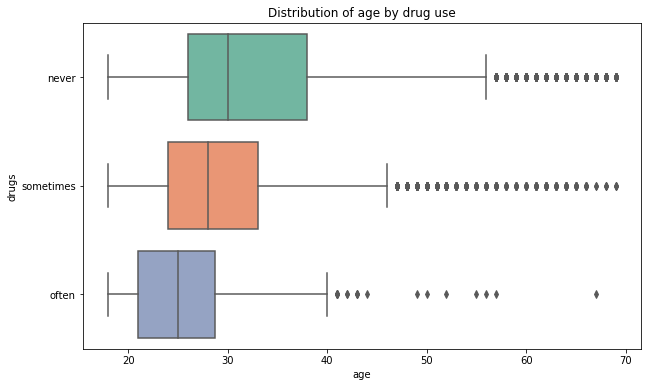

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(y="drugs", x="age", data=df, palette='Set2')
plt.title("Distribution of age by drug use")
plt.show()

Drugs show the most obvious difference by age groups. The group of people who use drugs very often has the youngest age distribution, while people who never use drugs have the oldest age distribution.

**Question 5.** We can do an interesting thought-experiment by asking “what is the hybrid of the most frequent value (i.e. mode) of each user-variable?” Draw the profile of this "typical" user. Is this analysis relevant? Discuss why or why not.

In [20]:
age = df['age'].mode()
body_type = df['body_type'].describe().top
diet = df['diet'].describe().top
drinks = df['drinks'].describe().top
drugs = df['drugs'].describe().top
education = df['education'].describe().top
ethnicity = df['ethnicity'].describe().top
height = df['height'].mode()
# We dropped the observations with income = -1.
income = df[df['income']!=-1]['income'].mode()
# We dropped the observations whose job is other.
job = df[df['job']!='other']['job'].describe().top
last_online = df['last_online'].describe().top
location = df['location'].describe().top
offspring = df['offspring'].describe().top
orientation = df['orientation'].describe().top
pets = df['pets'].describe().top
religion = df['religion'].describe().top
sex = df['sex'].describe().top
sign = df['sign'].describe().top
smokes = df['smokes'].describe().top
speaks = df['speaks'].describe().top
status = df['status'].describe().top
typical = pd.DataFrame({
    'age' : age,
    'body_type' : body_type,
    'diet' : diet,
    'drinks' : drinks,
    'drugs' : drugs,
    'education' : education,
    'ethnicity' : ethnicity,
    'height' : height,
    'income' : income,
    'job' : job,
    'last_online' : last_online,
    'location' : location,
    'offspring' : offspring,
    'orientation' : orientation,
    'pets' : pets,
    'religion' : religion,
    'sex' : sex,
    'sign' : sign,
    'smokes' : smokes,
    'speaks' : speaks,
    'status' : status,
})
typical

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,26,average,mostly anything,socially,never,graduated from college/university,white,70.0,20000,student,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single


This is the profile of the 'typical' user who is the hybrid of the most frequent value (i.e. mode) of each user. We omitted the essays, because it is difficult to get a 'typical' essay of all users.

In [21]:
df[df.job == 'student'].age.mode()

0    22
dtype: int64

In [22]:
df[df.job == 'student']['education'].describe().top

'working on college/university'

This is not relevant. 

For example, we find that the job of this 'typical' user is student. But the age of the user is 26, and the education is 'graduated from college/university'. 

From above, we discovered that the typical age of a student is 22 and the typical education of a student is 'working on college/university'. Thus, the profile of the 'typical' user, a 26-year old student already grudated from college/university, is not even typical among student. Therefore, it is definitely not relevant to the typical one among all users.

<br>

# II. Consult with the Larger Data Science Team

During the lab, we will have a class discussion about your initial observations, findings, and ideas for potentially interesting questions to further investigate. The class will then select the two most interesting research questions to pursue.

**Question 1.** Investigate the research question that the class ranked as being the most interesting to further investigate. 

- What is the relationship between drugs and income?

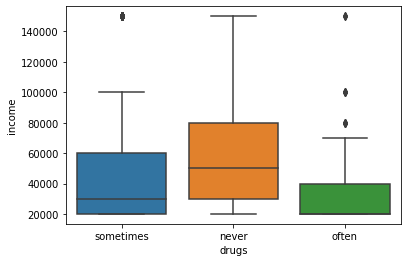

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# drop out the observations with meaningless values.
drug_income = df[['drugs','income']].dropna()
drug_income = drug_income[drug_income.income != -1]

# drop out the outliers
def remove(df):
    q1 = df['income'].quantile(0.25)
    q2 = df['income'].quantile(0.5)
    q3 = df['income'].quantile(0.75)
    IQR = q3 - q1
    return df[(df['income'] < (q3 + 1.5 * IQR)) & (df['income'] > (q1 - 1.5 * IQR))]
drug_income = remove(drug_income)

plt.figure()
sns.boxplot(x="drugs",y="income",data=drug_income)
plt.show()

In [26]:
drug_income.groupby('drugs').describe()

income                                                         \
            count          mean           std      min      25%      50%   
drugs                                                                      
never      6992.0  60316.075515  36714.989908  20000.0  30000.0  50000.0   
often       142.0  34436.619718  27093.864891  20000.0  20000.0  20000.0   
sometimes  2000.0  45310.000000  32037.745060  20000.0  20000.0  30000.0   

                              
               75%       max  
drugs                         
never      80000.0  150000.0  
often      40000.0  150000.0  
sometimes  60000.0  150000.0

After dropping out meaningless values and outliers in the dataframe, we drew a boxplot of income for different answers to drugs.

We discovered that although the max and min value of the three types of drugging habits are exactly the same, as for the mean value of income, that of people who often take drugs are the lowest, that of the income of people who never take drugs are the highest, and that of people who sometiems take drug are in the middle.

This property if also true for the 25% quantile, medium, and 75% quantile.

Thus, we concluded that people with lower income are tend to take drugs more frequently and the people with higher income are tend to take drugs less frequently.

**Question 2.** Explore the research question that the class ranked as being the second most interesting to further investigate **OR** explore another research question of your choice, if you find it is a more interesting direction to pursue. Explain your choice, and explore the chosen research question.

- The relationship between ethnicity and sexual orientation.

In [27]:
df4 = df[~df.ethnicity.isnull()].reset_index(drop=True) # remove rows with missing values in ethnicity
e_list = df4.ethnicity.str.split(",")

rows = []
for i in range(len(e_list)):
    for e in e_list[i]:
        # select some columns otherwise the dataset would be too large for this question
        other_cols = df4.loc[i, ['orientation', 'ethnicity']] 
        other_cols = other_cols.to_dict()

        other_cols['ethnicity'] = e.strip()
        rows.append(other_cols)

df4 = pd.DataFrame(rows)

In [56]:
df4.groupby('ethnicity').count()

,orientation
ethnicity,
asian,8205
black,3328
hispanic / latin,5357
indian,1449
middle eastern,950
native american,1265
other,3567
pacific islander,1473
white,37882


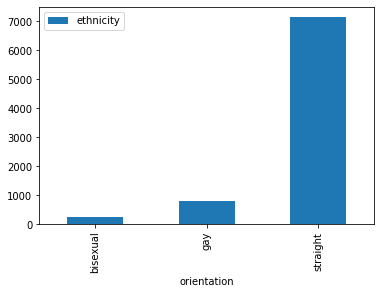

In [77]:
df4[df4.ethnicity == 'asian'].groupby('orientation').count().plot.bar()

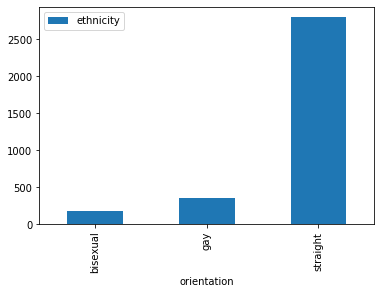

In [78]:
df4[df4.ethnicity == 'black'].groupby('orientation').count().plot.bar()

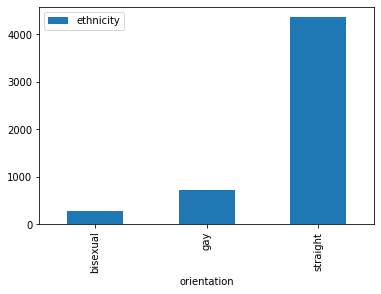

In [80]:
df4[df4.ethnicity == 'hispanic / latin'].groupby('orientation').count().plot.bar()

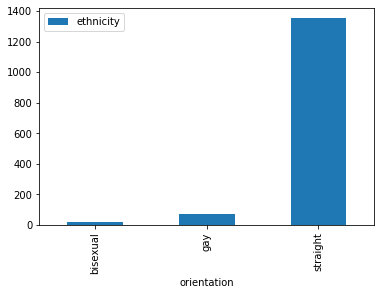

In [81]:
df4[df4.ethnicity == 'indian'].groupby('orientation').count().plot.bar()

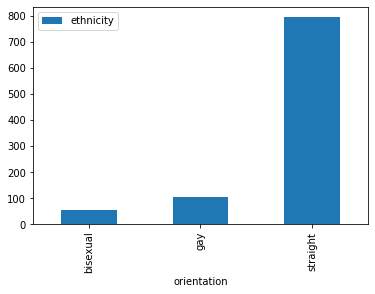

In [82]:
df4[df4.ethnicity == 'middle eastern'].groupby('orientation').count().plot.bar()

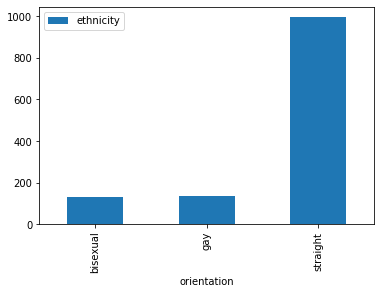

In [84]:
df4[df4.ethnicity == 'native american'].groupby('orientation').count().plot.bar()

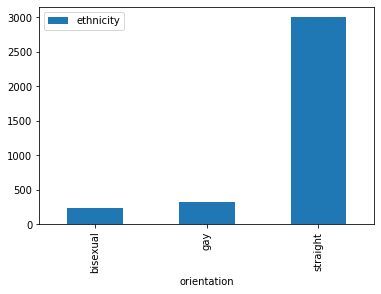

In [85]:
df4[df4.ethnicity == 'other'].groupby('orientation').count().plot.bar()

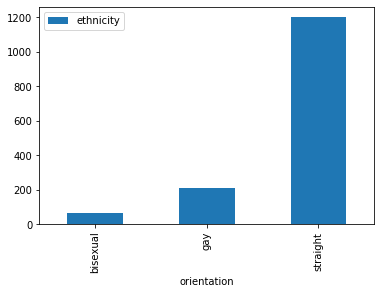

In [87]:
df4[df4.ethnicity == 'pacific islander'].groupby('orientation').count().plot.bar()

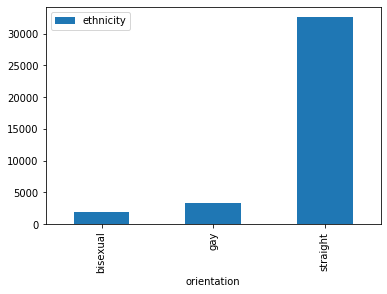

In [88]:
df4[df4.ethnicity == 'white'].groupby('orientation').count().plot.bar()

In all types of ethnicity, the most common sexual orientation is 'straight', with a small amount of users with sexual orientation as 'gay' and even a smaller amount as 'bisexual'.

But the sexual orientation 'gay' is more common to see in the ethnicity 'pacific islander' and 'hispanic / latin'; and the sexual orientation 'bisexual' is more common to see in the ethnicity 'native american' among all types of ethnicities.

 <br>
 <br>
 
 # <p style="background-color: #EEEEEE;text-align:center;padding-top: 15px;padding-bottom: 15px;" >Submission and Grading </p>
 
## Submission

**What should be submitted?**

* A Jupyter notebook using Python that contains all the data analyses. The flow of the notebook should be Markdown and Code cells weaved together. In addition make sure to comment your code in the code cells.

* Additional files that your notebook requires to compile properly (e.g. a data file).

* A report from your Jupyter notebook exported as a html file without the code cells. This can be done using [nbconvert](https://nbconvert.readthedocs.io/en/latest/).

**When should it be submitted?**
* At the end of the lab session (in-lab progress): Submit your current progress, i.e., <mark><b>before 2:30pm on the day of the laboratory, January 22.</b></mark> (Submit to Github Classroom, and Quercus)
* Homework (lab assignment completion): Upload your completed lab assignment by the next class, on <mark><b>Monday January 27 at 12:00pm (noon)</b></mark>. (Submit to Github Classroom, and Quercus)

**Where should the assignment be submitted?**
* Commit your finished notebook (ipynb and html versions), and any other files on the Github Classroom repository.
* Submit a pdf version of this notebook, including code cells (print this notebook to pdf) to Quercus.


## Grading

This laboratory assignment will be graded according to the following marking scheme.

| | Marks|
|--- |--- |
| In-lab progress | 5 |
| Lab assignment completion | 10 |
| Attendance for entire lab | 5 |
| **Total** | **20**|


Note that marks will be deduced for the following reasons: notebook doesn't compile; files are missingl; instructions are not followed.


### In-lab progress grading rubric

In-lab progress rubric is as follows (also available [here](https://jsc270.github.io/tut_grading.html#in-lab_progress)):

|Category|5|4|3|2|1|
|---|:---:|:---:|:---:|:---:|:---:|
|**Progress (5 pts)** | Excellent progress. Optimal use of lab time. The team was fully focused on getting the assignment done, and fully engaged. Excellent progress. | Good progress. Good use of lab time. The team was focused on getting the assignment done, and engaged. | Moderate progress. Used some of the lab time well. There was some focus on getting the assignment done, but the team was occasionnally distracted. | Insufficient progress. Poor use of lab time. The team was generally distracted, and did not focus much on the assignment. | Minimal progress. The team did barely use lab time to make progress on the assignment, and was often distracted. |

<br>

### Lab assignment completion grading rubric

Lab assignment completion grading rubric is as follows (also available [here](https://jsc270.github.io/tut_grading.html#lab_assignment_completion)):

|Category|5|4|3|2|1|
|---|:---:|:---:|:---:|:---:|:---:|
|**Planning of code and statistical analysis <br> (2.5 pts)** | Introductory comment describes overall strategy and gives evidence of preliminary planning. Thoughtful problem decomposition breaks the problem into independent pieces that can be solved easily. | Evidence of planning before coding, but some flaws in overall strategy. | More planning needed: overall strategy ok, but have missed some obvious ways of making the code simpler. | It all hangs together, but planning was absent or rushed. | No evidence of planning. Strategy deeply flawed.|
|**Programming execution and reproducibility of results <br> (2.5 pts)**| Mastery of Python vocabulary means that the absolute minimum amount of code is used to get the job done. Code free from duplication. Each function encapsulates a single task, and repeated tasks are performed by functions, not copy and paste. | Workable, but not elegant.  Common programming idioms used to reduce code. | The code works, but copy-paste used often. | Most of the code works, but some parts do not work. Copy-paste used very often. | Functions used inapproriately, or existing functions reinvented. Extensive use of copy and paste. |
|**Programming Clarity <br> (2.5 pts)** | Code is a pleasure to read, and easy to understand. Code and comments form part of a seamless whole. | Comments used to discuss the why, and not how of code; to provide insight into complicated algorithms; and to indicate purpose of function (if not obvious from its name). Comment headings used to separate important sections of the code. | Generally easy to read, but some comments used inappropriately: either too many, or too few. Some variable names confusing. | Hard to understand. Poor choice of names and comments do not generally aid understanding. | Cannot understand code. The reader cannot understand why the code works. |
|**Communication <br>(2.5 pts)**| Findings very well organised. Clear headings demarcate separate sections. Excellent flow from one section to the next. The report is easy to scan.  Tables and graphics carefully tuned and placed for desired purpose. | Findings well organised and sections clearly separated, but flow is lacking. Each section has clear purpose.  Tables and graphics clear and well chosen. | Generally well organised, but some sections muddled.  Tables or graphics appropriate, but some are poorly presented - e.g. too many decimal places, poorly chosen aspect ratio etc. | Sections unclear and no attempt to flow from one topic to the next. Graphics and tables poorly chosen to support questions. Some have fundamental flaws. | It is hard to read your notebook. There are no headings, figures are far away from where they are referenced in the text. There is no summary or conclusion. |